✔: 해결된 수정사항 <br>
✅: 미해결 수정사항 & 질문

In [15]:
import time
from selenium import webdriver
import urllib.request
import os

In [21]:
# 크롤러 실행
driver = webdriver.Chrome()  # 빈칸 시 path 검색(optional argument)
driver.get('https://www.google.co.kr/imghp?hl=ko')
time.sleep(1.5) # ✔시간 조정

# 검색창에 검색
search_box = driver.find_element_by_name('q')
search_keyword = input() # 입력 XXXXX
search_box.send_keys(search_keyword + " texture")
search_box.submit()
time.sleep(1.5)

In [22]:
SCROLL_PAUSE_SEC = 2

# 스크롤 높이 가져옴
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    # 끝까지 스크롤 다운
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # 2초 대기
    time.sleep(SCROLL_PAUSE_SEC)

    # 스크롤 다운 후 스크롤 높이 다시 가져옴
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        try:
            driver.find_element_by_css_selector(".mye4qd").click()
            print("결과 더보기 click")
        except:
            break
        
    last_height = new_height

결과 더보기 click


In [16]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

https://images.unsplash.com/photo-1587937364630-fa578b2b60f1?ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8aWNlJTIwdGV4dHVyZXxlbnwwfHwwfHw%3D&ixlib=rb-1.2.1&w=1000&q=80
http://imagescdn.gettyimagesbank.com/500/16/544/932/0/537908558.jpg
https://images.creativemarket.com/0.1.0/ps/5515339/1820/1213/m1/fpnw/wm1/hrl180oiozvkqbmmpsslvbt7drjq6v1ducphfuol7yhgbe7p9mdwar6skvaxx03c-.jpg?1544127150&s=303a6e1dbec35ecfac59fcdb19b36453
https://images.unsplash.com/photo-1577481759269-e704c1871a26?ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8aWNlJTIwdGV4dHVyZXxlbnwwfHwwfHw%3D&ixlib=rb-1.2.1&w=1000&q=80
https://besthqwallpapers.com/Uploads/30-11-2019/113618/thumb2-blue-ice-texture-winter-background-ice-background-winter-texture-ice.jpg
https://images.unsplash.com/photo-1545769451-845a3dd4b33b?ixid=MnwxMjA3fDB8MHxzZWFyY2h8NHx8aWNlJTIwdGV4dHVyZXxlbnwwfHwwfHw%3D&ixlib=rb-1.2.1&w=1000&q=80
https://img.pixers.pics/pho_wat(s3:700/FO/71/63/30/91/700_FO71633091_d0a2be28c94bc98fe84edda9f6f903e6.jpg,700,467,cms:2018/10/5bd1b6b8d04b8_220
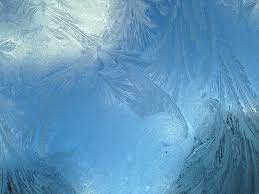

In [24]:
count = 1
images = driver.find_elements_by_css_selector(".rg_i.Q4LuWd")

stock = ["stock", "istockphoto", "shutterstock", "adobe", "dreamstime", "encrypted", "as1", "previews"]
save_path = "Style_Images/" + search_keyword + "/"
createFolder(save_path)

for image in images:
    try:
        #image.click() # ✔ElementClickInterceptedException: Message: element click intercepted: ~~ 에러 해결: 바로 아래줄
        driver.execute_script("arguments[0].click();", image) # ✅문제: 한 이미지 여러번 저장됨
        time.sleep(0.7) # ✔시간 조정
        image_url = driver.find_element_by_xpath("/html/body/div[2]/c-wiz/div[3]/div[2]/div[3]/div/div/div[3]/div[2]/c-wiz/div/div[1]/div[1]/div[2]/div[1]/a/img").get_attribute("src")

        # stock 예외처리
        # ✔indentation 두번 -> 한번으로 수정
        isStock = False
        for i in stock:
            isStock = i in image_url
            if isStock:
                break
    
        if not isStock:
            print("count : ", count, "| ", image_url)
            urllib.request.urlretrieve(image_url, save_path + "{}.jpg".format(search_keyword + str(count)))
            count += 1
        else:
            continue
    except:
        pass
            
# ✅Q. for문 탈출 조건이 무엇인지?
# A. 모든 이미지를 저장했으면 탈출합니다.

# ✅Q. "HTTPError: HTTP Error 403: Forbidden"으로 끝나는데 정상 종료인 것인지?
# A. 아마 다운로드 가능한 이미지가 없어서 해당 증상이 뜨는 것 같고 try, except 문으로 해결

# <urlopen error [WinError 10060] 연결된 구성원으로부터 응답이 없어 연결하지 못했거나, 호스트로부터 응답이 없어 연결이 끊어졌습니다>
# A. 속도가 너무 빨라 생기는 증상?

In [8]:
#time.sleep(2) # ✔대기 시간 삭제
driver.quit() # 창 닫기